# Car Price Prediction

[Link Kaggle:](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data)

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

In [4]:
#missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
#Column type and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
#Desccribe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [8]:
df.describe(include="object").T

,count,unique,top,freq
CarName,205,147,toyota corona,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


- No missing values in the data.
- No duplicated values in the data.

## 3. Analyze and Visualization

### 3.1 Univariate Analysis

In [9]:
#drop car_ID column
df.drop(columns=["car_ID"], inplace=True)

In [10]:
#Create functions to visualize the data
def countplot(column_name, rotation=0):
    """
    column_name must be categorical
    """
    plt.figure(figsize=(15,6))
    sns.countplot(data=df, x=column_name)
    plt.title(f"{column_name}")
    plt.xticks(rotation=rotation)
    plt.show()

def pieplot(column_name):
    """
    column_name must be categorical with 2 or 3 cat
    """
    plt.pie(df[column_name].value_counts(), labels=df[column_name].value_counts().index, autopct="%1.2f%%", shadow=True)
    plt.show()

def boxplot(column_name, bins=0):
    """
    column_name must be numerical
    """
    fig,ax=plt.subplots(1,2, figsize=(15,6))
    sns.boxplot(data=df, x=column_name, ax=ax[0])
    sns.histplot(data=df, x=column_name, ax=ax[1], bins=bins)
    ax[0].set_ylabel(column_name)
    ax[0].set_xlabel("FRQ")
    ax[1].set_ylabel(column_name)
    plt.show()

#### Symboling

In [11]:
df["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

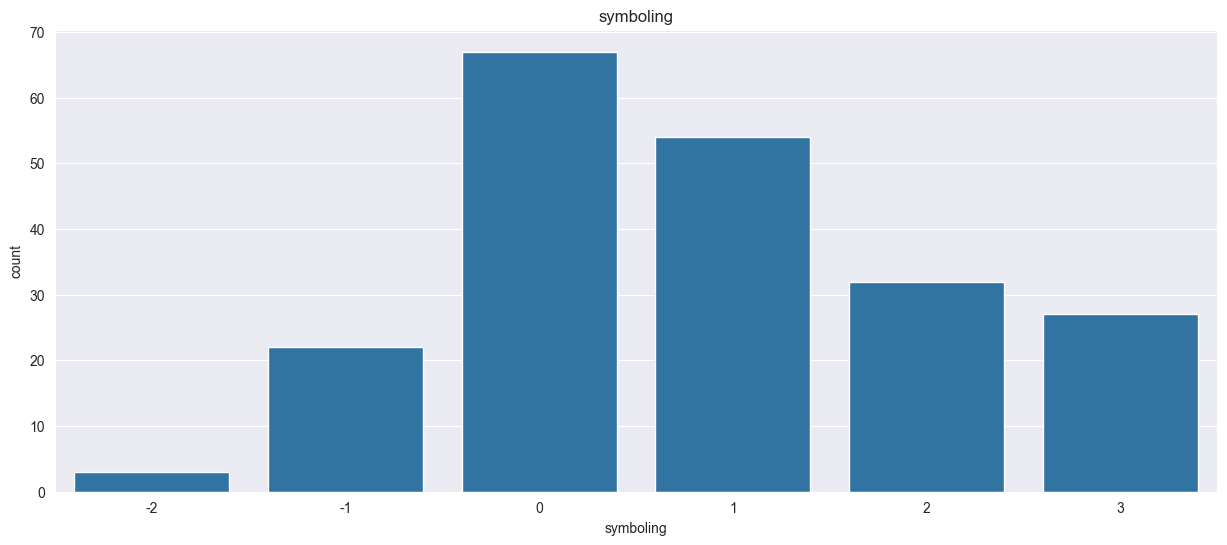

In [12]:
countplot("symboling")

- Symboling is a risk rating where +3 indicates that the car is high risk, while -3 indicates that it is relatively safe. As we can see, there are no cars rated at -3 for risk, and the majority of cars have a rating of 0 for risk.

#### CarName

In [13]:
df["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [14]:
#first we need to fix the column
df["CarName"]=df["CarName"].apply(lambda x: str(x).split(" ")[0].lower())

In [15]:
df["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

We have to fix some datas like.
- maxda : mazda
- porcshce : porsche
- toyouta : toyota
- vokswagen : volkswagen

In [16]:
df["CarName"].replace({"maxda":"mazda", "porcshce":"porsche", "toyouta":"toyota", "vokswagen":"volkswagen"}, inplace=True)

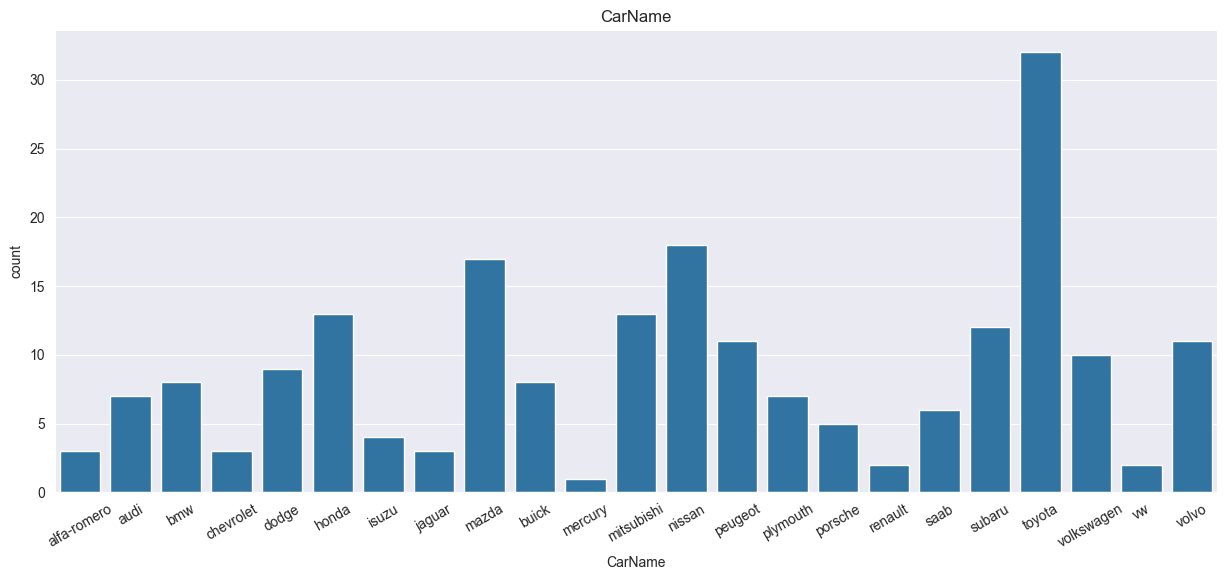

In [17]:
countplot("CarName", rotation=30)

- Toyota is the most favorite car.

#### FuelType

In [18]:
df["fueltype"].unique()

array(['gas', 'diesel'], dtype=object)

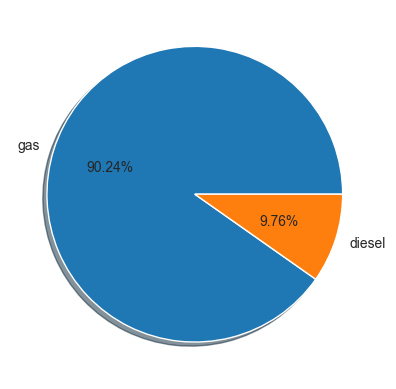

In [19]:
pieplot("fueltype")

- Most fuel Type is gas than diesel.

#### Aspiration

In [20]:
df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

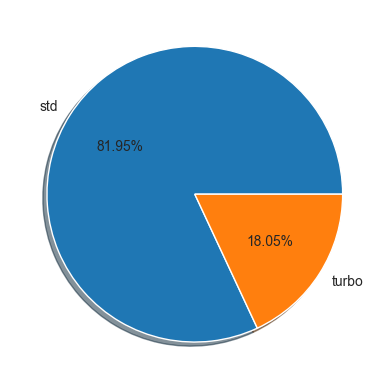

In [21]:
pieplot("aspiration")

- Most cars supplying air to the engine using naturally aspirated.

#### DoorNumber

In [22]:
df["doornumber"].unique()

array(['two', 'four'], dtype=object)

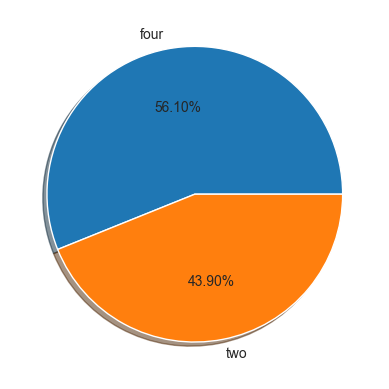

In [23]:
pieplot("doornumber")

- Most Cars have 4 doors.

In [24]:
df["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

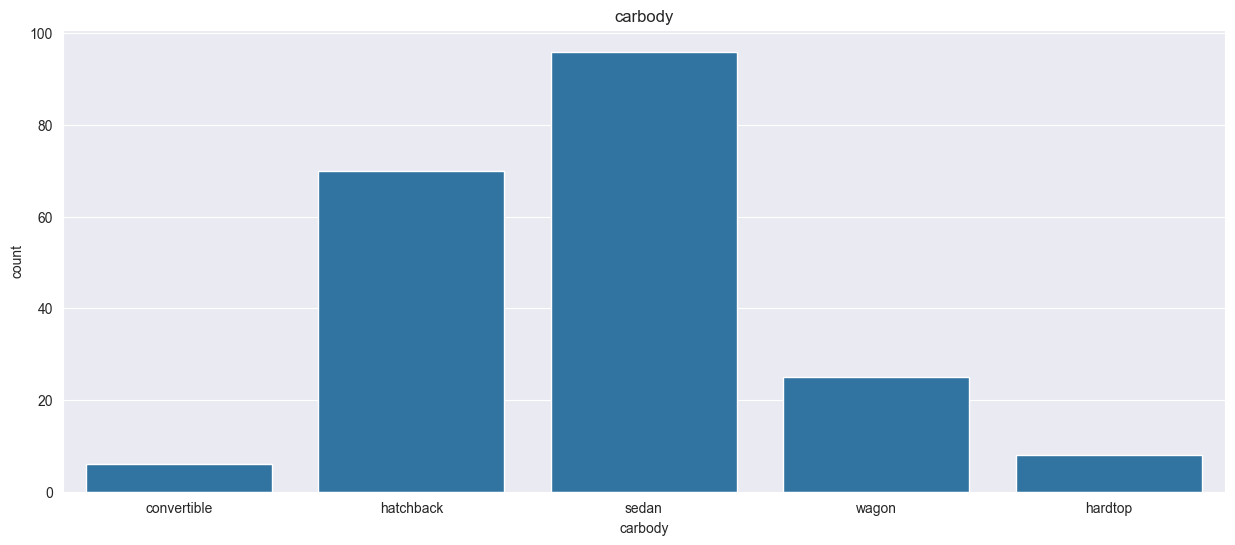

In [25]:
countplot("carbody")

- "Most of the cars in the dataset are sedans, and the ones with the lowest quantity are convertibles.

#### Drivewheel

In [26]:
df["drivewheel"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

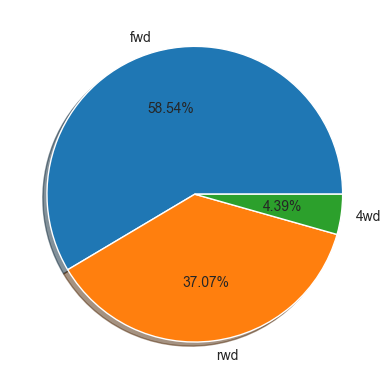

In [27]:
pieplot("drivewheel")

- Most of the cars in the dataset are Front wheel drive.

#### EngineLocation

In [28]:
df["enginelocation"].unique()

array(['front', 'rear'], dtype=object)

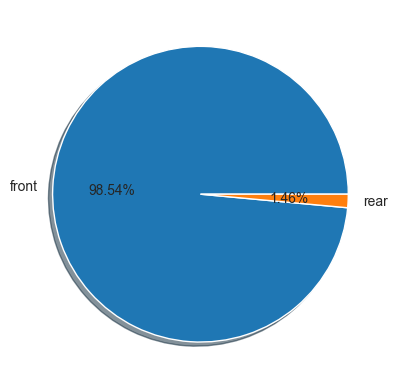

In [29]:
pieplot("enginelocation")

- Most of the cars have the engine in the front of the car.

#### Wheelbase

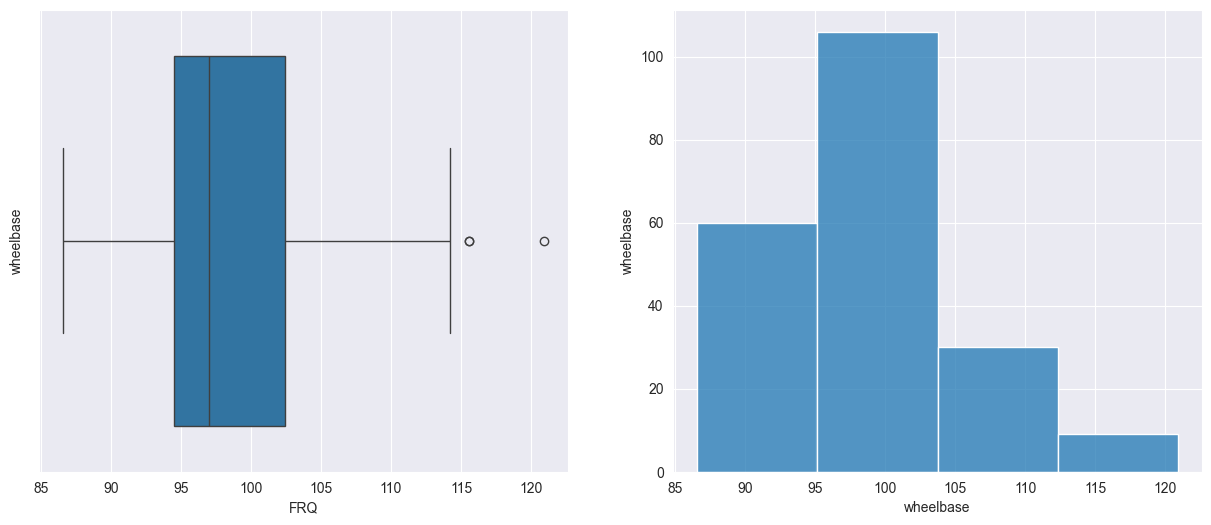

In [30]:
boxplot("wheelbase",4)

- Most cars have a medium wheelbase which is 98 cm.

#### Carlength

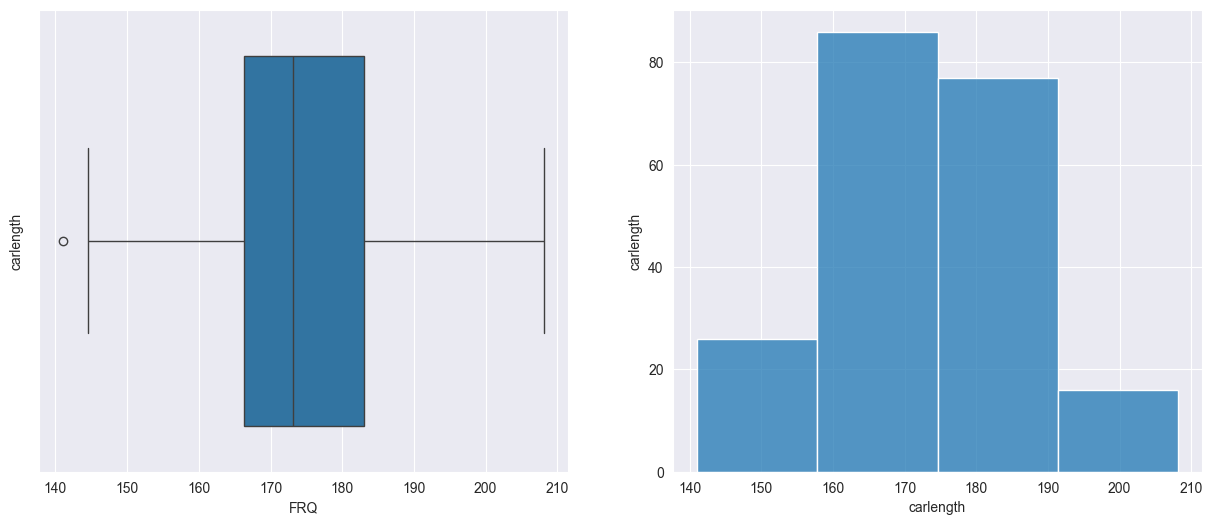

In [31]:
boxplot("carlength",4)

- The average length of the cars is 173 cm.

#### Width

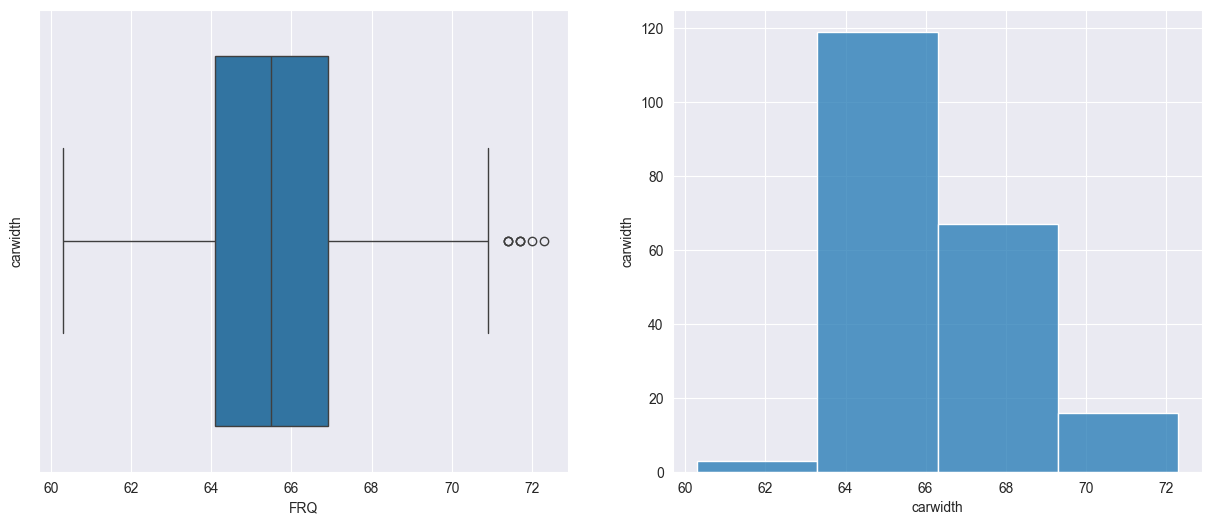

In [32]:
boxplot("carwidth",4)

- The average width of the cars are 65 cm.

#### Height

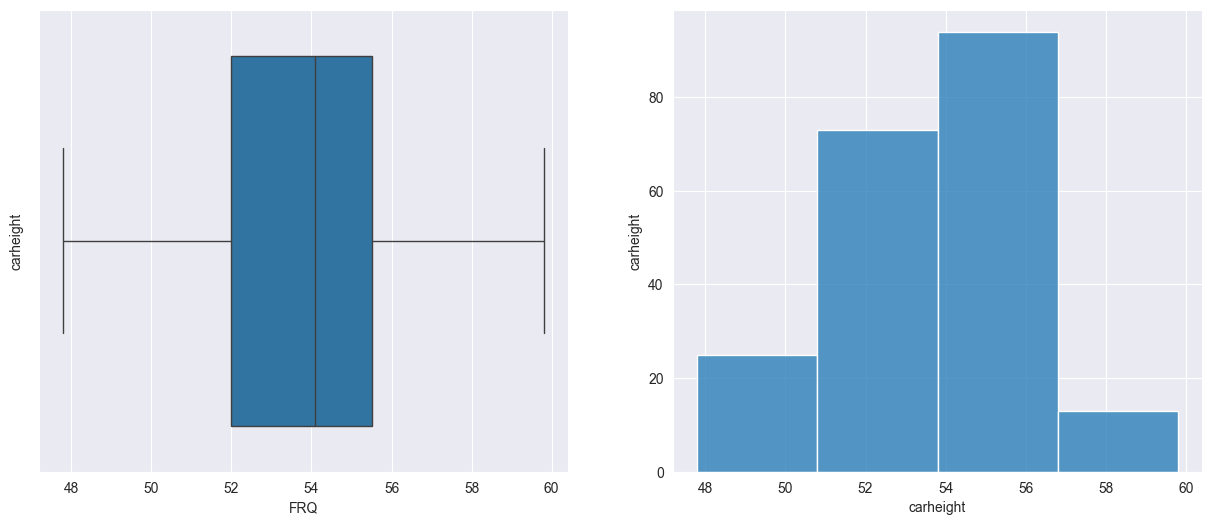

In [33]:
boxplot("carheight",4)

#### Type of Engine

In [34]:
df["enginetype"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

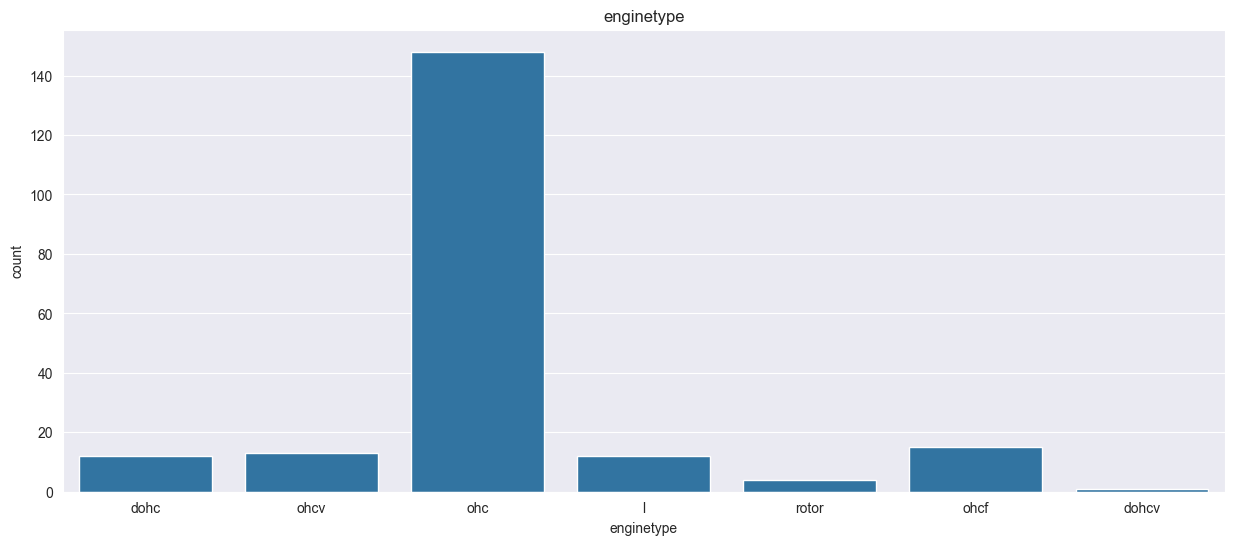

In [35]:
countplot("enginetype")

- Most car have type of engine ohc.

#### CylinderNumber

In [36]:
df["cylindernumber"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

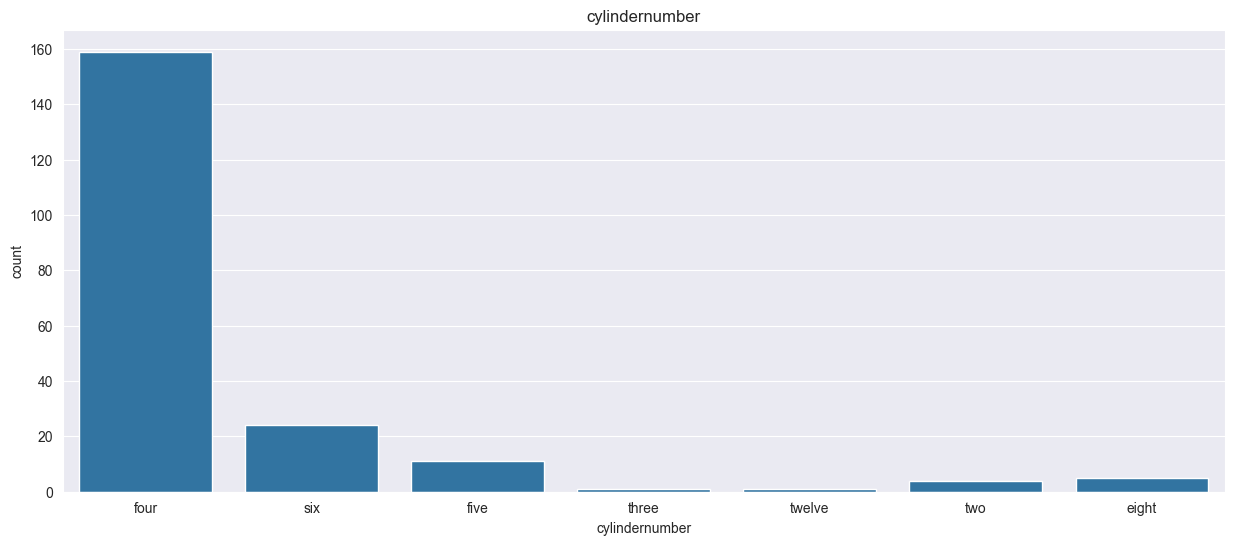

In [37]:
countplot("cylindernumber")

- The most number of cylinder in the cars are four.

### 3.2 Multivariate Analysis

In [38]:
var_cat = df.select_dtypes(include="object").columns.tolist() #We separated the categorical variables

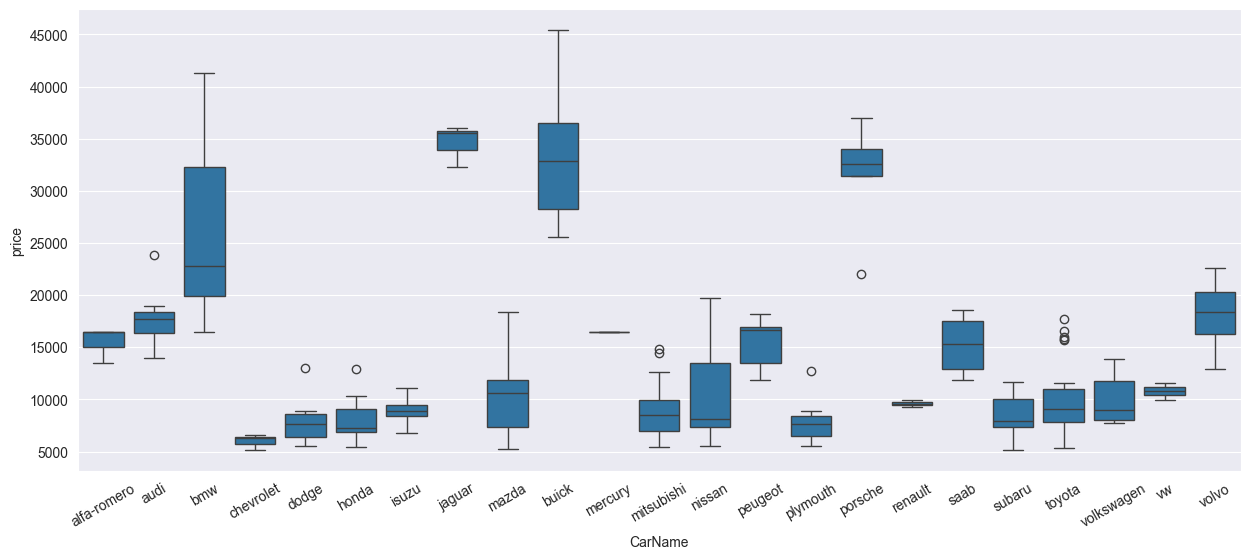

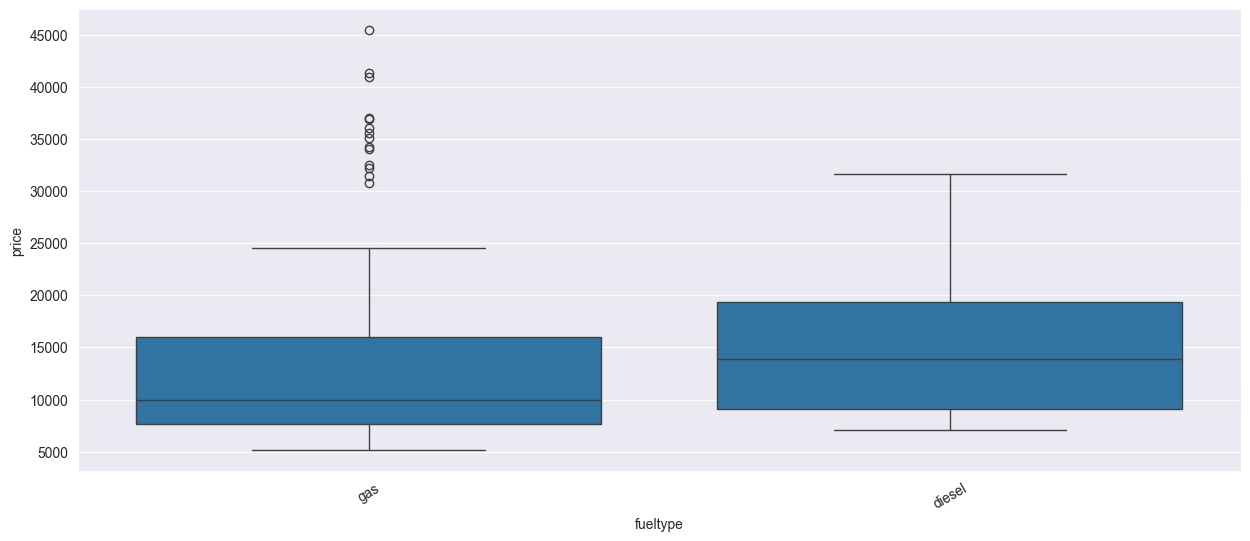

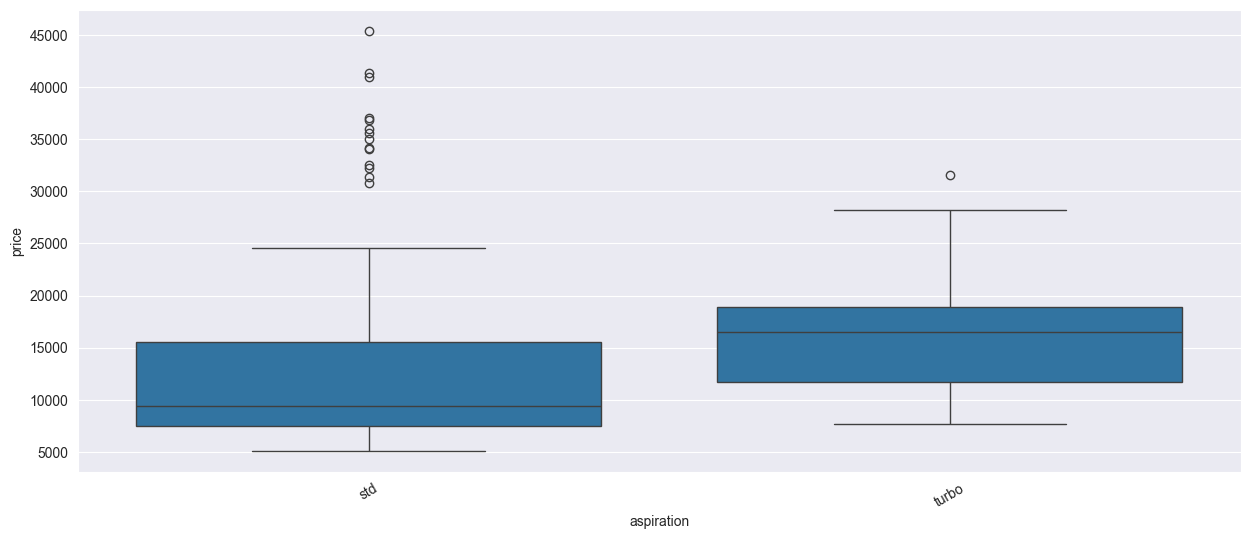

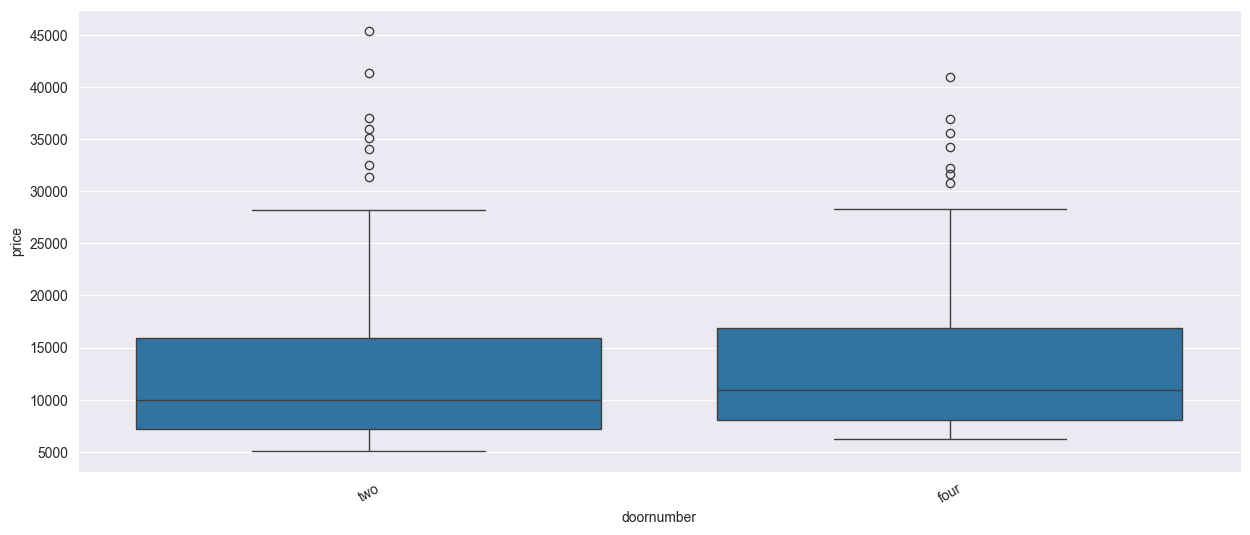

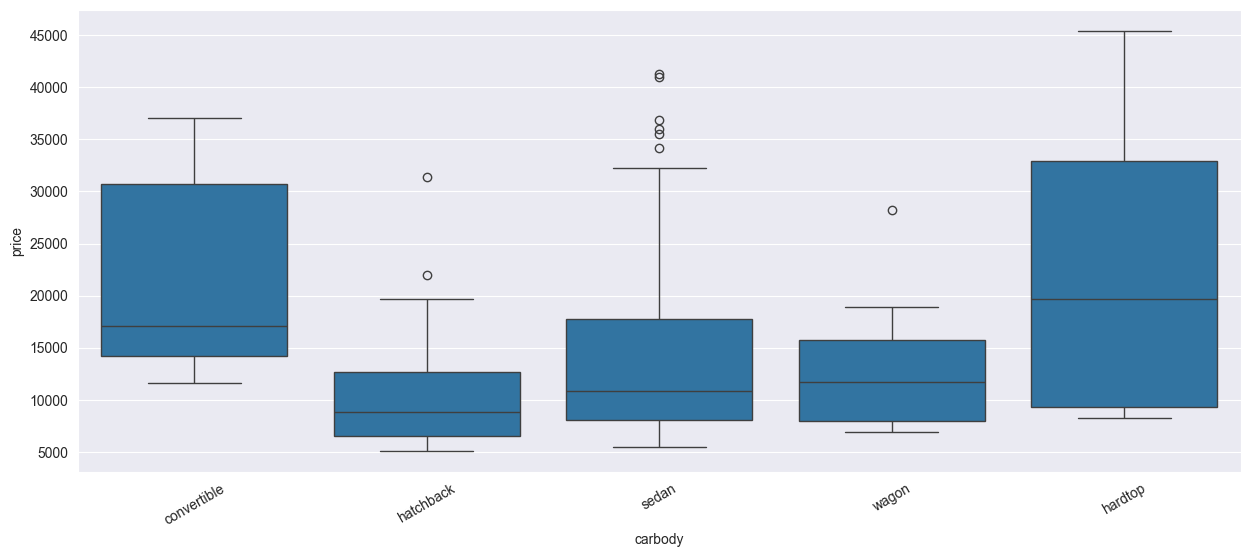

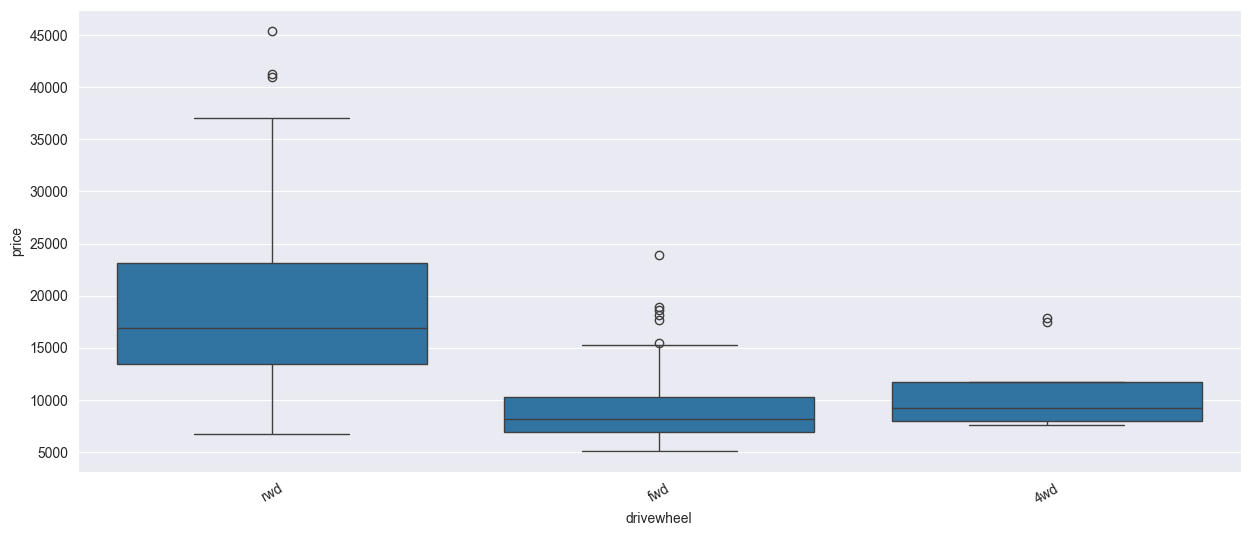

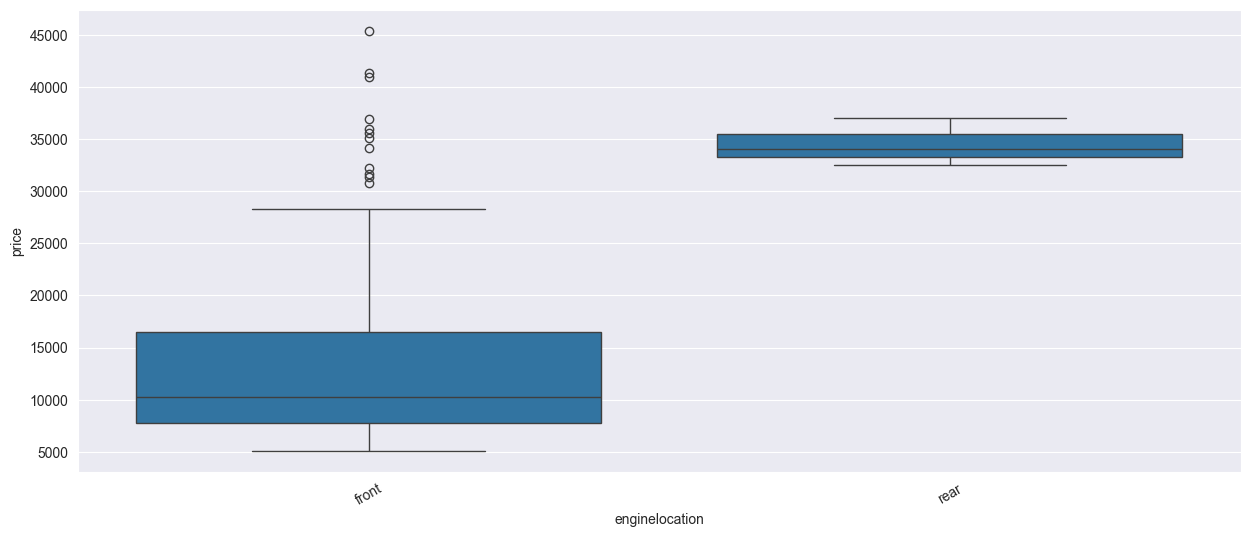

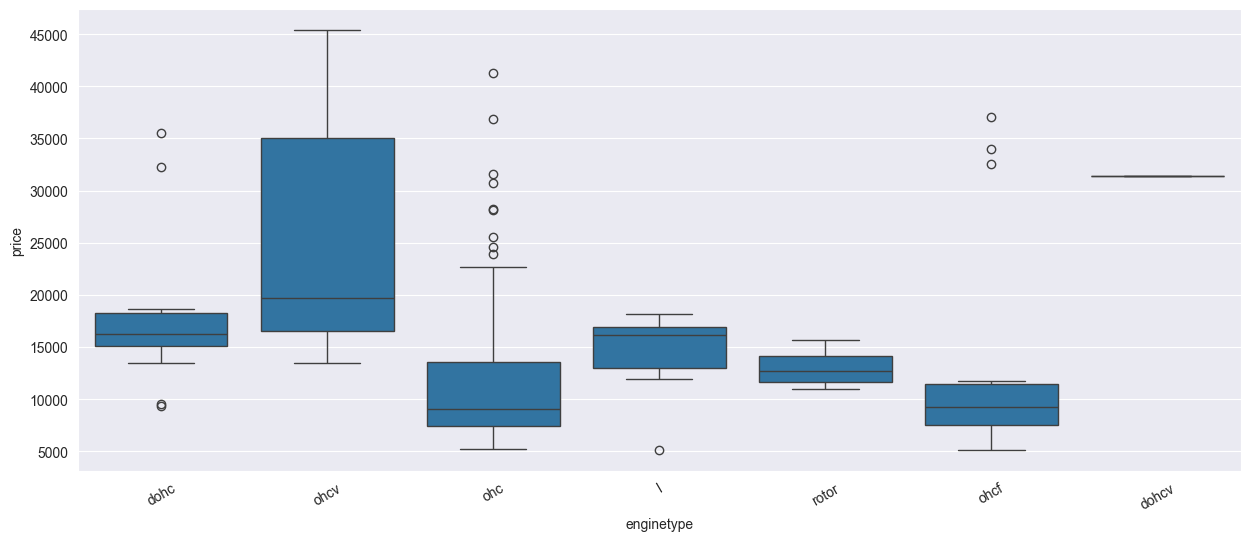

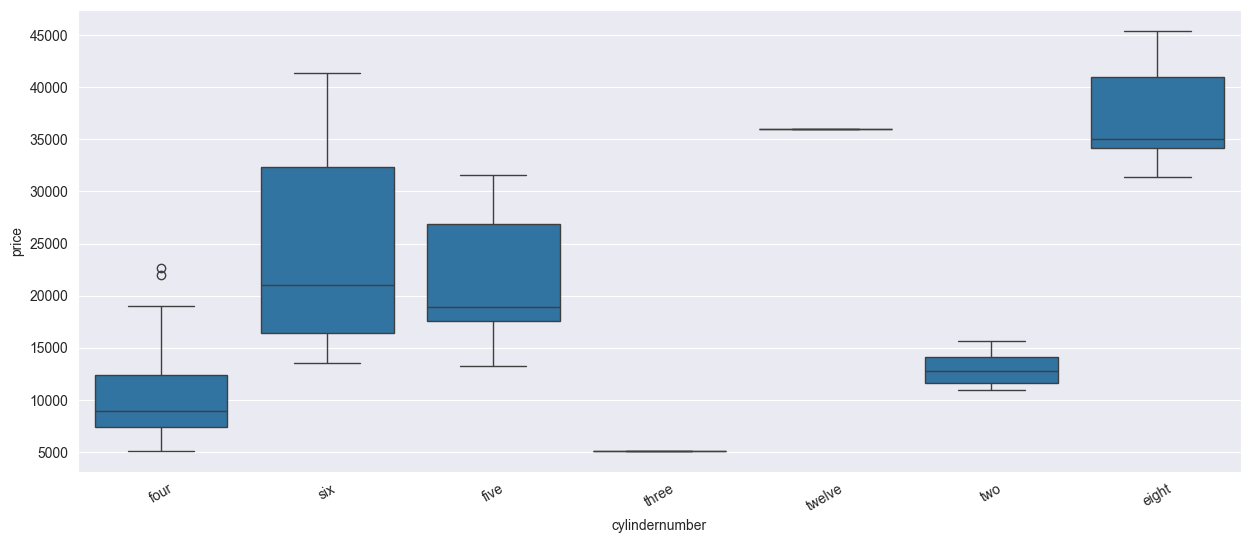

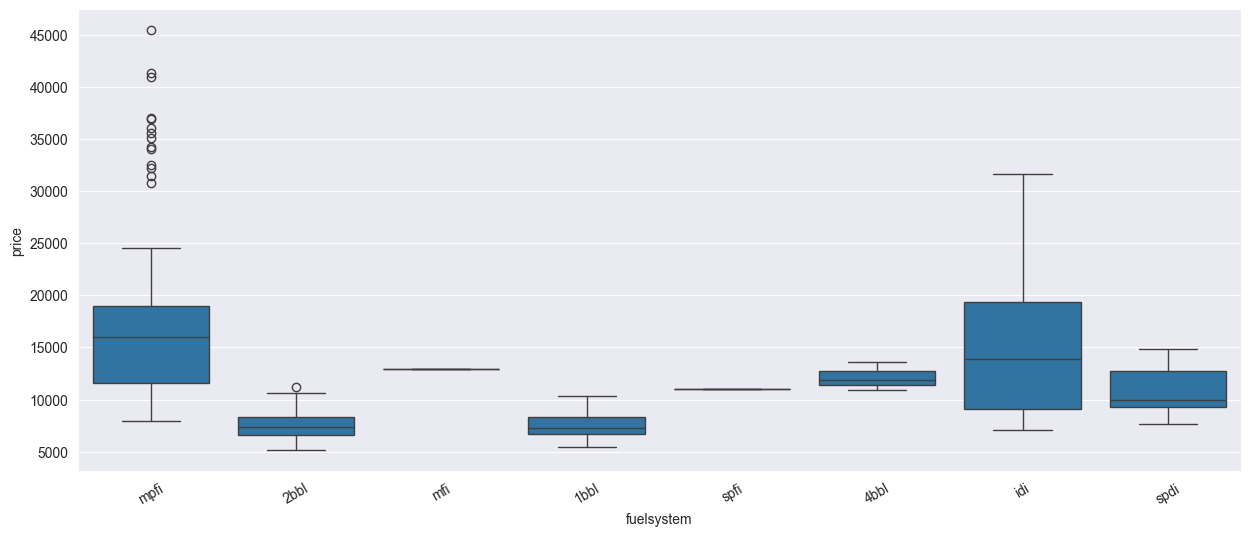

In [39]:
for v in var_cat:
    plt.figure(figsize=(15,6))
    sns.boxplot(data=df, x=v, y="price")
    plt.xticks(rotation=30)
    plt.show()

### Insights
- Diesel is slightly more expensive than gas.
- The cars with four doors are slightly expensive than cars with two doors.
- Convertibles and Hardtop are more expensive than other car bodys.
- The cars with front engine location are cheaper than those cars with the engine location in the rear.
- The cylinder number has a significant impact on the price.

In [40]:
num_cat=[x for x in df.columns if x not in (var_cat) and x not in ("price")]

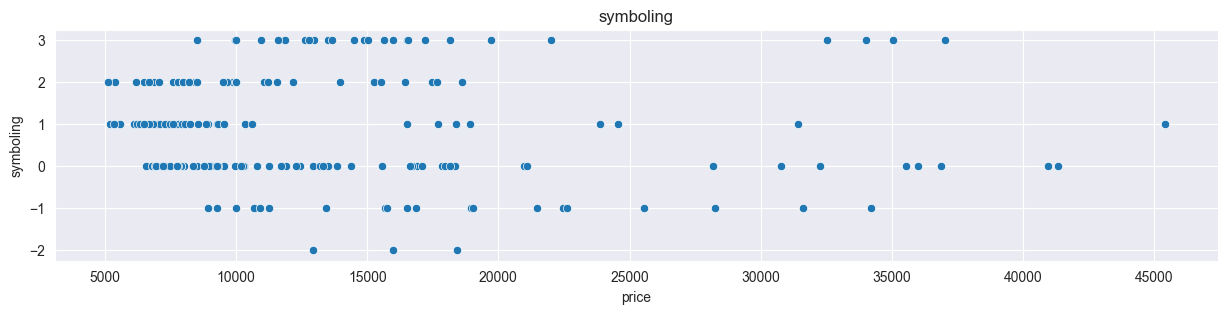

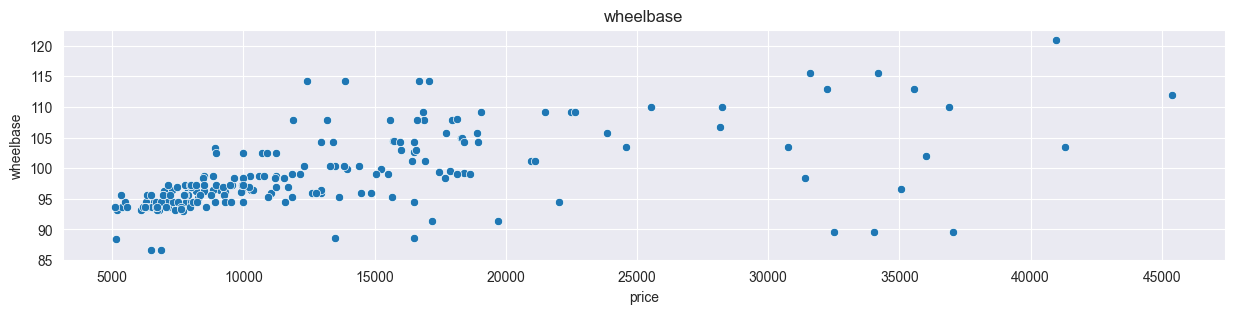

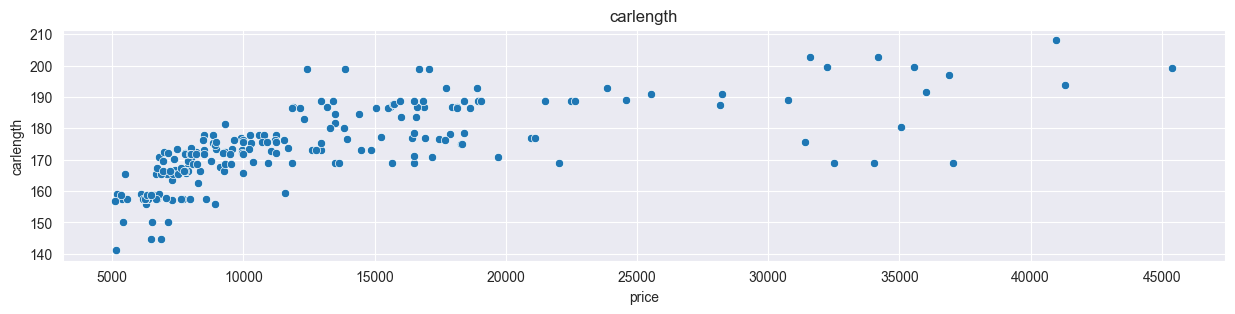

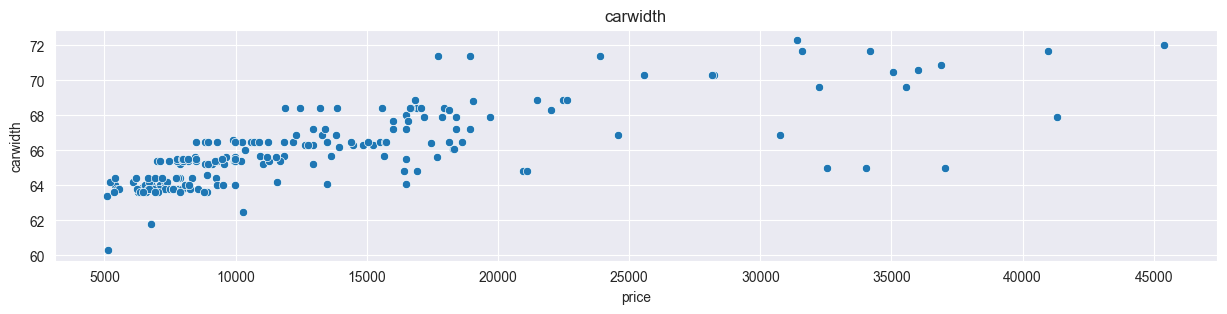

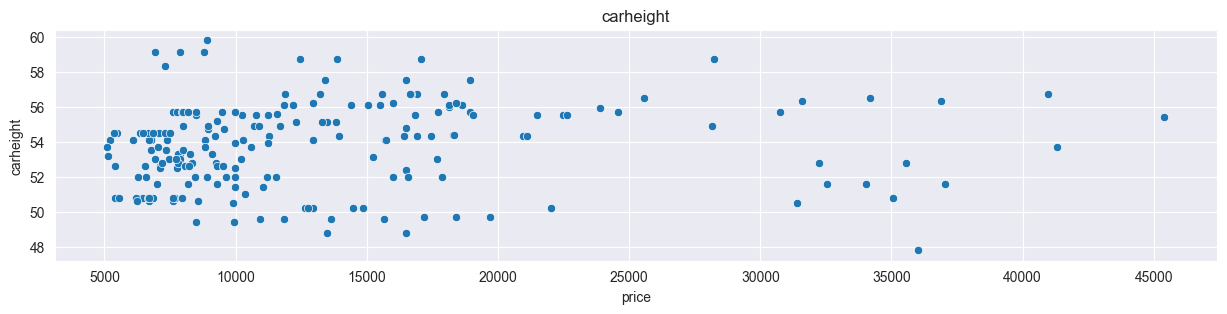

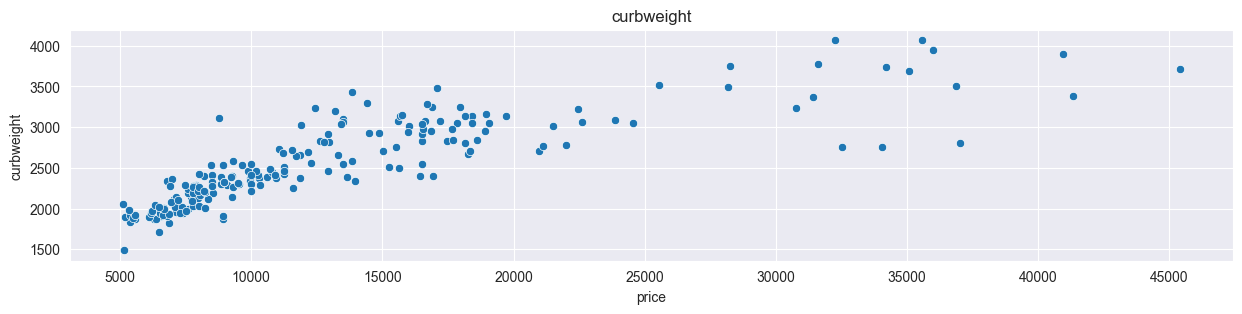

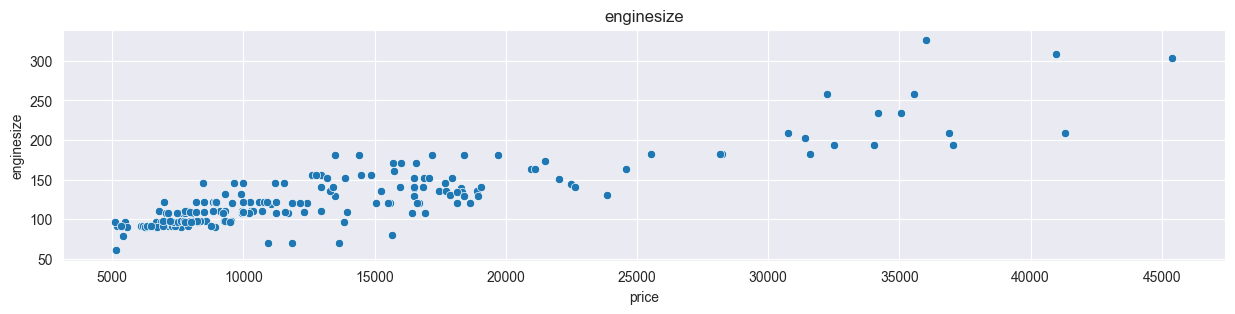

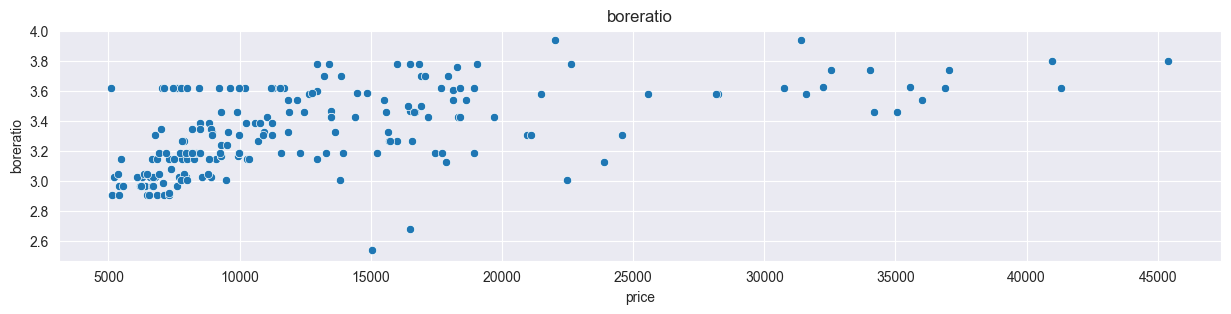

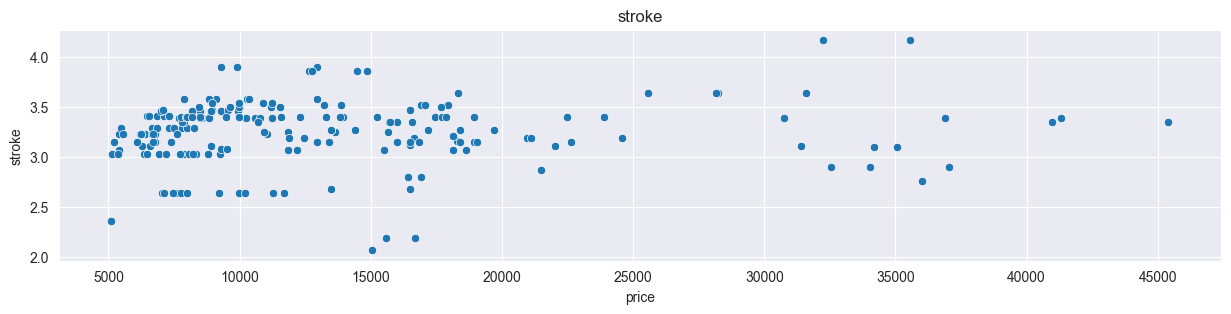

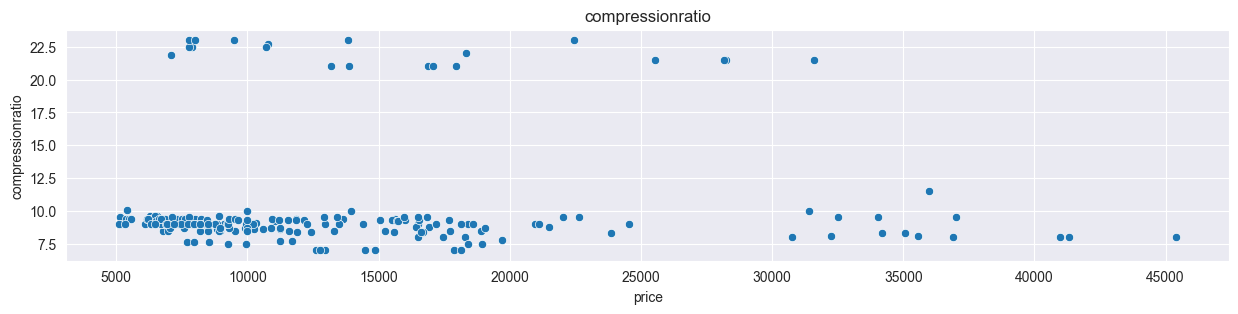

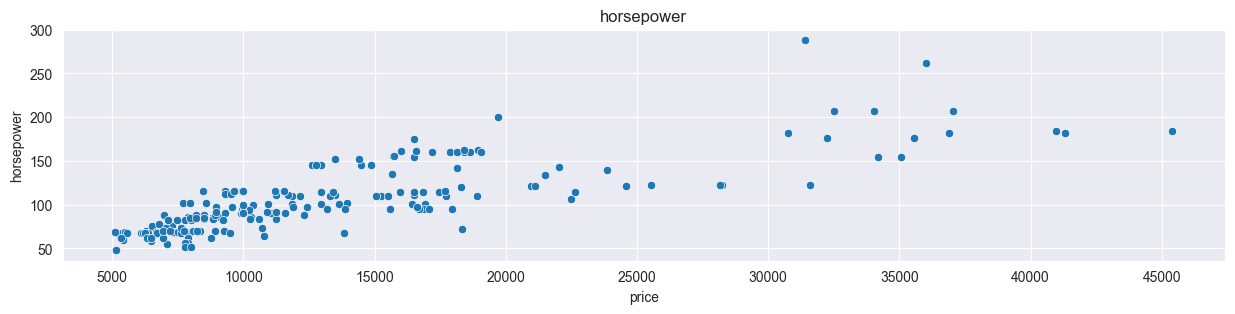

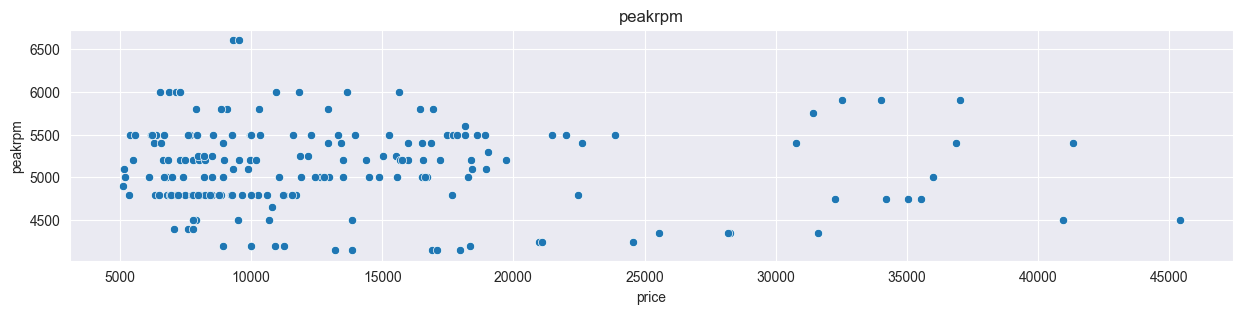

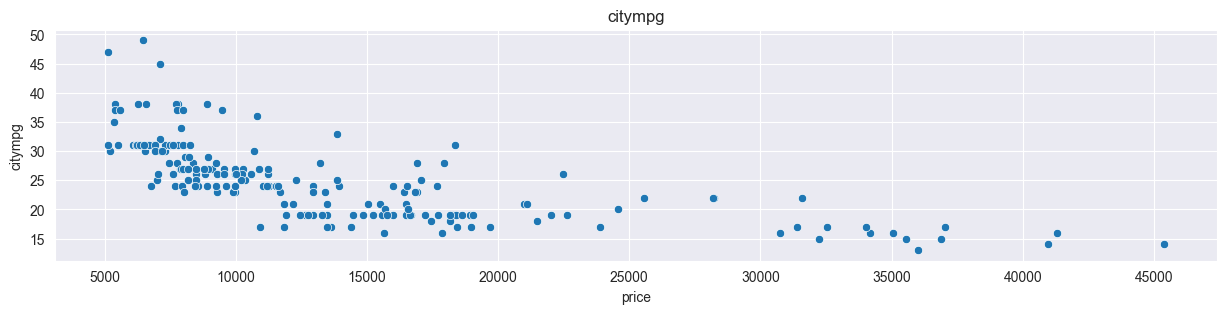

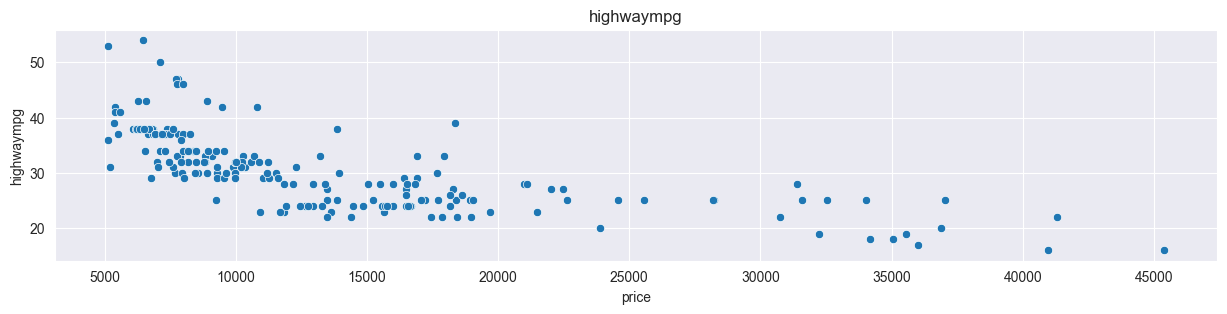

In [41]:
for n in num_cat:
    plt.figure(figsize=(15,3))
    sns.scatterplot(data=df, x="price", y=n)
    plt.title(f"{n}")
    plt.show()

### Insights
- carlenght, carwidth, curbweigth, enginesize and horse power have a positive realtion with de price.

## 4.Split the variables

### 4.1 Import the libraries to model

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [43]:
y = df.iloc[:,-1:]

X = df.iloc[:,:-1]

In [44]:
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [45]:
#At this moment we can proceed to drop some variables that show a weak realtionship with the price 
var_to_drop=["doornumber", "fuelsystem", "compressionratio", "stroke", "symboling"]

In [46]:
X=X.drop(columns=var_to_drop)

In [47]:
X.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,peakrpm,citympg,highwaympg
0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,111,5000,21,27
1,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,111,5000,21,27
2,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,154,5000,19,26
3,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,102,5500,24,30
4,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,115,5500,18,22


In [48]:
var_cat=X.select_dtypes(include="object").columns.tolist()

In [49]:
#Initiate the encoder
le = LabelEncoder()
for v in var_cat:
    X[v]=le.fit_transform(X[v])

In [50]:
X.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,peakrpm,citympg,highwaympg
0,0,1,0,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,3.47,111,5000,21,27
1,0,1,0,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,3.47,111,5000,21,27
2,0,1,0,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,2.68,154,5000,19,26
3,1,1,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,3.19,102,5500,24,30
4,1,1,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,3.19,115,5500,18,22


In [51]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size=0.2, random_state=42)

In [52]:
var_to_stand=["wheelbase", "carlength", "carwidth",
              "carheight", "curbweight", "enginesize",
              "boreratio", "horsepower","peakrpm", "citympg", "highwaympg"]

In [53]:
#Standardizing the data
scaler = StandardScaler()
X_train[var_to_stand] = scaler.fit_transform(X_train[var_to_stand])
X_test[var_to_stand] = scaler.transform(X_test[var_to_stand])

### 4.2 LinearRgression

In [54]:
#Initiate the model
lr = LinearRegression()

In [55]:
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = lr.predict(X_test)

In [57]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mse {mse}")
print(f"mae {mae}")
print(f"r2 {r2}")

mse 11472557.848853353
mae 2296.3846620576933
r2 0.8546747718064408


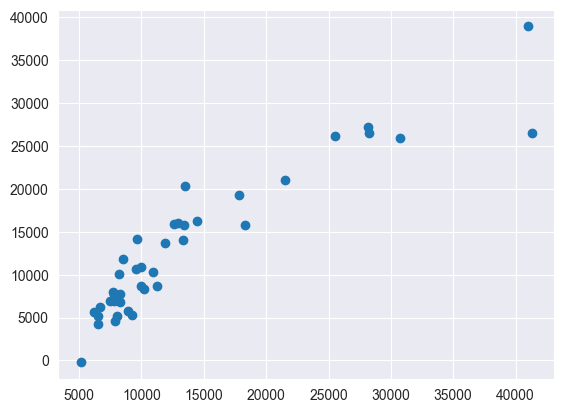

In [58]:
plt.scatter(y_test, y_pred)

### RandomForestRegressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf = RandomForestRegressor()

In [61]:
rf.fit(X_train, y_train)

C:\Users\errev\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [62]:
y_pred = rf.predict(X_test)

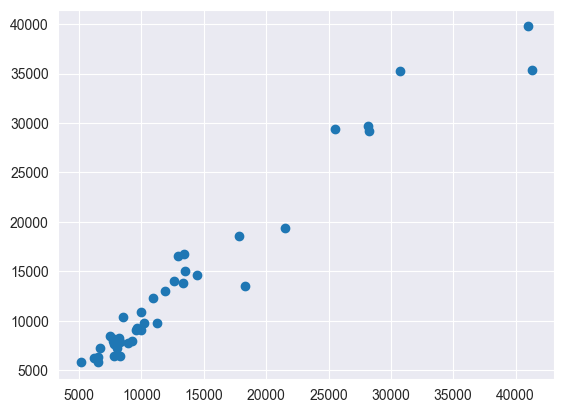

In [63]:
plt.scatter(y_test, y_pred)

In [64]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mse {mse}")
print(f"mae {mae}")
print(f"r2 {r2}")

mse 3770731.953561546
mae 1367.2155667828108
r2 0.9522353699299196


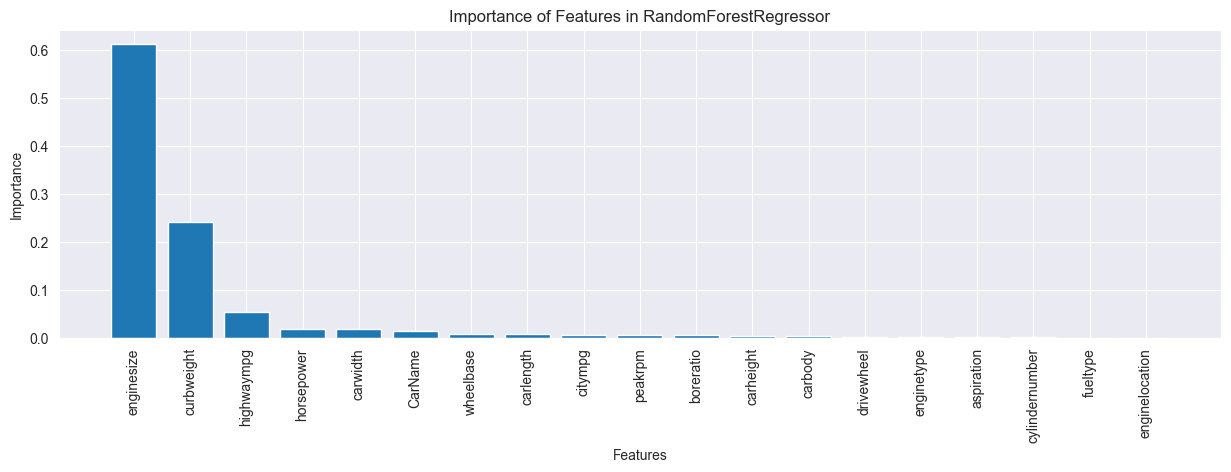

In [65]:
importances = rf.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]
plt.figure(figsize=(15,4))
plt.title("Importance of Features in RandomForestRegressor")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[x] for x in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

*The vertical bars represent the importance of each feature. The higher the bar, the more influential that feature is in our predictions. The most important features are at the top of the chart, while the least important ones are at the bottom. This knowledge is crucial for understanding which variables have a greater impact on our model's predictions. It also helps us make informed decisions on how to enhance our model or simplify it if necessary.*

***Linear Regression gives us an R2 of 84% compared to the 95.22% we get with RandomForest.***